In [13]:
import argparse
import time

import pandas as pd

import matplotlib.pyplot as plt

class AutoDictionary(dict):
    """Implementation of perl's autovivification feature."""
    def __getitem__(self, item):
        try:
            return dict.__getitem__(self, item)
        except KeyError:
            value = self[item] = type(self)()
            return value

name  = "data_"
nodes = ["5653", "55ad", "55e4", "5599", "55dd", "5565", "560b", "5632", "55b3", "5563", "630a"]
#nodes = ["5653"]
ext   = ".csv"

values = [["fsk_rssi", "fsk_cca_rssi"], ["oqpsk_rssi", "oqpsk_cca_rssi"], ["ofdm_rssi", "ofdm_cca_rssi"]]

# Packets per minute
items = len(nodes)
limit = 0

rssi = AutoDictionary()
cca  = AutoDictionary()

# Iterate over all nodes
for node in nodes:
    print("Parsing node = {} ".format(node))
    
    # Create measurement name
    filename = name + node + ext
    
    # Read values from csv
    filename = name + node + ext
    data = pd.read_csv(filename, index_col=0) 
    
    # Repeat for all modulations (i.e., FSK, OQPSK, OFDM) and column (i.e., RSSI, CCA)
    for v in values:    
        # Retrieve RSSI and CCA data and store it
        rssi[node][v[0]] =  data[v[0]]
        cca[node][v[1]] =  data[v[1]]

Parsing node = 5653 
Parsing node = 55ad 
Parsing node = 55e4 
Parsing node = 5599 
Parsing node = 55dd 
Parsing node = 5565 
Parsing node = 560b 
Parsing node = 5632 
Parsing node = 55b3 
Parsing node = 5563 
Parsing node = 630a 


Parsing node = 5653 
Parsing node = 55ad 
Parsing node = 55e4 
Parsing node = 5599 
Parsing node = 55dd 
Parsing node = 5565 
Parsing node = 560b 
Parsing node = 5632 
Parsing node = 55b3 
Parsing node = 5563 
Parsing node = 630a 


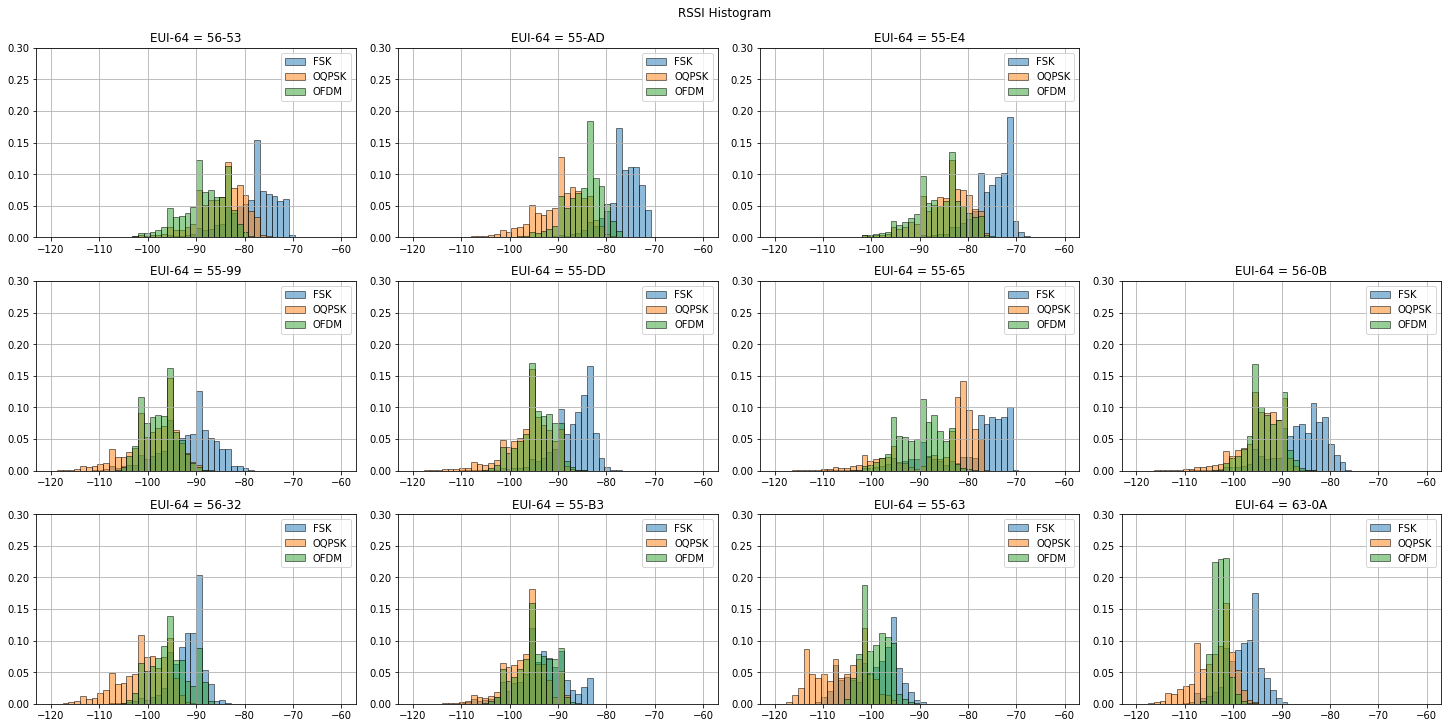

In [17]:
nrow = 3
ncol = 4

fig, axs = plt.subplots(nrow, ncol, figsize=(20,10), constrained_layout=True)

keys = list(rssi.keys())
keys.insert(3, None)

for ax, key in zip(enumerate(fig.axes), keys):
    if key is not None:
        print("Parsing node = {} ".format(key))
        data_fsk = rssi[key]["fsk_rssi"]
        data_qpsk = rssi[key]["oqpsk_rssi"]
        data_ofdm = rssi[key]["ofdm_rssi"]
        ax[1].hist(data_fsk, bins=50, range=(-120, -60), density=True, alpha = 0.5, edgecolor='k', label="FSK")
        ax[1].hist(data_qpsk, bins=50, range=(-120, -60), density=True, alpha = 0.5, edgecolor='k', label="OQPSK")
        ax[1].hist(data_ofdm, bins=50, range=(-120, -60), density=True, alpha = 0.5, edgecolor='k', label="OFDM")
        ax[1].legend()
        name = (key[:2] + '-' + key[2:]).upper()
        ax[1].set_title("EUI-64 = {}".format(name))
        ax[1].set_ylim(0, 0.3)
        ax[1].grid()
    
fig.delaxes(axs[0][3])
fig.suptitle("RSSI Histogram")
plt.savefig("06_rssi_hist.png", dpi=300)

Parsing node = 5653 
Parsing node = 55ad 
Parsing node = 55e4 
Parsing node = 5599 
Parsing node = 55dd 
Parsing node = 5565 
Parsing node = 560b 
Parsing node = 5632 
Parsing node = 55b3 
Parsing node = 5563 
Parsing node = 630a 


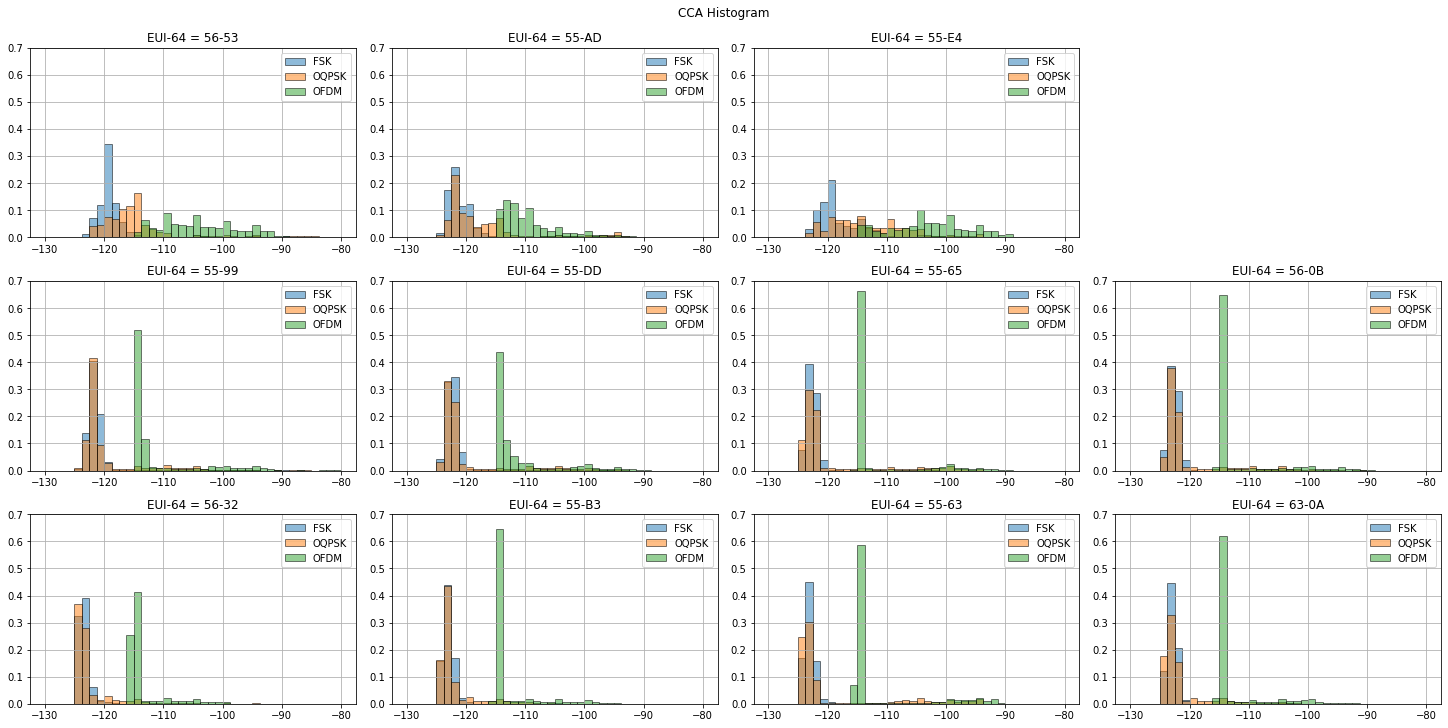

In [18]:
nrow = 3
ncol = 4

fig, axs = plt.subplots(nrow, ncol, figsize=(20,10), constrained_layout=True)

keys = list(rssi.keys())
keys.insert(3, None)

for ax, key in zip(enumerate(fig.axes), keys):
    if key is not None:
        print("Parsing node = {} ".format(key))
        data_fsk = cca[key]["fsk_cca_rssi"]
        data_qpsk = cca[key]["oqpsk_cca_rssi"]
        data_ofdm = cca[key]["ofdm_cca_rssi"]
        ax[1].hist(data_fsk, bins=40, range=(-130, -80), density=True, alpha = 0.5, edgecolor='k',  label="FSK")
        ax[1].hist(data_qpsk, bins=40, range=(-130, -80), density=True, alpha = 0.5, edgecolor='k',  label="OQPSK")
        ax[1].hist(data_ofdm, bins=40, range=(-130, -80), density=True, alpha = 0.5, edgecolor='k', label="OFDM")
        ax[1].legend()
        name = (key[:2] + '-' + key[2:]).upper()
        ax[1].set_title("EUI-64 = {}".format(name))
        ax[1].set_ylim(0, 0.7)
        ax[1].grid()
        
fig.delaxes(axs[0][3])
fig.suptitle("CCA Histogram")
plt.savefig("06_cca_hist.png", dpi=300)